In [151]:
%load_ext autoreload
%autoreload 2

In [152]:
import json, pickle
from math import factorial
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt

In [153]:
def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

def c(n , r):
    return factorial(n) // (factorial(n - r) * factorial(r))

In [220]:
size = 8
sum([c(size, i) for i in range(1, size+1)])

255

In [211]:
num_of_processes = 7
done = set([0])

while len(done) < num_of_processes + 1:
    indices = np.where(np.random.randint(2, size=3) == 1)[0]
    idx = (2**indices).sum()
    
    if idx in done:
        continue
        
    done.add(idx)
    print(indices, idx)

[1 2] 6
[2] 4
[0 1] 3
[0 2] 5
[1] 2
[0] 1
[0 1 2] 7


In [212]:
# Load data (deserialize)
with open('cache/probability_graphs.pickle', 'rb') as handle:
    probability_graphs = pickle.load(handle)

probability_graphs

defaultdict(probability_graph.ProbabilityGraph,
            {3: <probability_graph.ProbabilityGraph at 0x1c402155390>,
             4: <probability_graph.ProbabilityGraph at 0x1c402285cf8>,
             1: <probability_graph.ProbabilityGraph at 0x1c4023a9160>,
             6: <probability_graph.ProbabilityGraph at 0x1c402444e80>,
             5: <probability_graph.ProbabilityGraph at 0x1c402629160>,
             7: <probability_graph.ProbabilityGraph at 0x1c4027c20f0>,
             2: <probability_graph.ProbabilityGraph at 0x1c401ff6940>})

In [213]:
probability_graphs[1].graph_life

{'u': defaultdict(tuple, {'n': (1.0, 21)}),
 'n': defaultdict(tuple, {'t': (1.0, 21)}),
 't': defaultdict(tuple, {'_': (0.5121951219512195, 41), 'o': (0.0, 42)}),
 '_': defaultdict(tuple,
             {'1': (0.2857142857142857, 63),
              't': (0.04838709677419355, 62),
              '4': (0.0, 49),
              '2': (0.0, 57),
              '3': (0.0, 58),
              '6': (0.0, 55),
              '5': (0.0, 42),
              '9': (0.0, 51),
              '7': (0.0, 61)}),
 '1': defaultdict(tuple,
             {'_': (0.02857142857142857, 105),
              '6': (0.0008143322475570033, 1228),
              '~': (0.05090311986863711, 1218),
              '0': (0.19063004846526657, 1238),
              '1': (0.0, 1217),
              '2': (0.0, 1220),
              '3': (0.0, 1222),
              '4': (0.0, 1224),
              '5': (0.0, 1226),
              '9': (0.0, 1234),
              '7': (0.0, 1230),
              '8': (0.0, 1232),
              '+': (0.0, 1135)}),
 

In [214]:
lives = []
for i in probability_graphs:
    for context_token_x, graph_lifes in probability_graphs[i].graph_life.items():
        for context_token_y, graph_life_x in graph_lifes.items():
            lives.append(graph_life_x)
            
lives = np.array(lives)

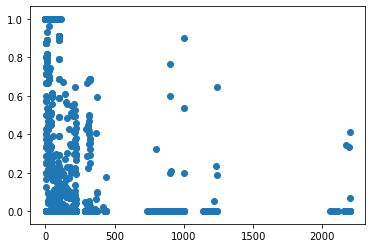

In [215]:
plt.scatter(lives[:,1], lives[:,0])

In [216]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(lives)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(342.37013284470913, 0.25)

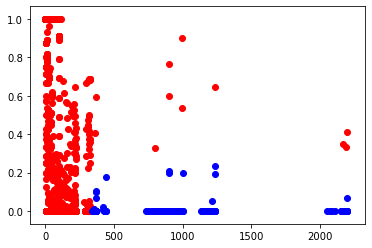

In [217]:
colors = ['r', 'b']
# labels = kmeans.labels_
a = lives[:,1].mean()
a += lives[:, 1][lives[:,1] < a].max()
b = 0.25#lives[:,0].mean()
labels = ((lives[:,1] > a) & (lives[:,0] < b)).astype(np.int8)
# labels
for i, color in enumerate(colors):
    livs = lives[labels == i]
    plt.scatter(livs[:,1], livs[:,0], color=color)
    
a, b

In [203]:
lives[]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices